### Implementation in Python

we will use Sklearn module to implement decision tree algorithm. 
Sklearn uses CART (classification and Regression trees) algorithm and by default it uses Gini impurity as a criteria to split the nodes.

There are other algorithms like ID3, C4.5, Chi-square etc. 

We will see the use of CART in following implementation.

In [1]:
import pandas as pd
#import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.externals.Six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
data = pd.read_csv("winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No Null values, Great Data.

In [5]:
# Creating the Feature and Target data
X = data.drop(columns='quality')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
y = data['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [7]:
# Splitting the training and testing data
from sklearn import tree
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [8]:
# Lets create and fit the model.
clf = DecisionTreeClassifier()

In [9]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [11]:
clf.score(x_train,y_train)

1.0

In [12]:
py_pred = clf.predict(x_test)

In [13]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.6354166666666666

Now we haven't done any pre-processing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

### What are hyper parameters?
<img src="hypr_params.PNG" width="700">


We can see above the decision tree classifier algorithm takes all those parameters which are also known as hyperparameters.

When we do hyperparameter tuning, we basically try to find those sets and values of hyperparameters which will give us a model with maximum accuracy.
Let's go ahead and try to improve our model.

Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy.


PCA (Principal Component Analysis) is a technique used to reduce dimensionality. i.e. to reduce any No. of features to a desired No. of features without much data loss.

Standard Scalling is a must for PCA.
So We will start with scaling our data. so that all the data points are in a common range.

In [14]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

In [16]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)

In [17]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

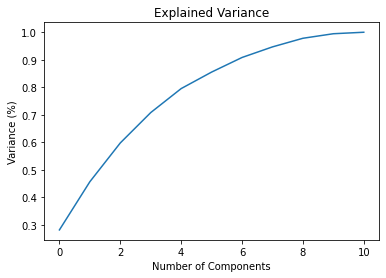

In [18]:
import matplotlib.pyplot as plt
plt.figure()    # Creating a figure object
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')    #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 95% of the variance is being explained by 8 components.
So instead of giving all 11 columns as input in our algorithm let's use these 8 principal components instead.

In [19]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [20]:
principal_x.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258


In [21]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.5833333333333334

There is a little increase in our test accuracy. Great!!

Let's now try to tune some hyperparameters using the GridSearchCV algorithm.

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.

It does a exhaustive generation of combination of different parameters passed. Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

In [22]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [23]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [24]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [25]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [26]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [27]:
clf.score(x_test,y_test)

0.5729166666666666

Great!! Our test score has improved after using Gridsearch.

Note : we must understand that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

You are welcome to try tweaking the parameters more and try an improve the accuracy more.

 Let's visualize the tree:


In [28]:
# let's save the model
import pickle

with open('D:\Akash\Recover\MY NOTES\Machine Learning\iNneuron\Decision tree'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('D:\Akash\Recover\MY NOTES\Machine Learning\iNneuron\Decision tree'+ '/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('D:\Akash\Recover\MY NOTES\Machine Learning\iNneuron\Decision tree'+ '/pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)